# Effects of Different Bike Rideable Types on Distance/Time 

## Investigation Overview

In this investigation, I wanted to investigate how the different rideable types effect the riders distance and time spent on the bike.

## Dataset Overview

The data consisted of 158,168 different bike riders. There are two different rideable types, electric and dock bikes. There are also two kinds of riders, Members and Casual riders. Over 3500 datapoints were dropped either due to massive outliers or incomplete data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline
#loading in the dataset
bike_data = pd.read_csv('202006-baywheels-tripdata.csv')
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
#adding a new column for total ride time in minutes
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format='%Y-%m-%d %H:%M:%S')
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S')
bike_data['ride_time'] = (bike_data['ended_at'] - bike_data['started_at']).astype('timedelta64[m]')
bike_data = bike_data[bike_data['ride_time'] <120]

In [3]:
def find_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1_r = math.radians(lat1)

    lon1_r = math.radians(lon1)
    lat2_r = math.radians(lat2)
    lon2_r = math.radians(lon2)

    dlon = lon2_r - lon1_r

    dlat = lat2_r - lat1_r

    a = math.sin(dlat / 2)**2 + math.cos(lat1_r) * math.cos(lat2_r) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c * 0.621371 #the .621371 is to convert from kilometers to miles
    return distance
bike_data['distance'] = bike_data.apply(lambda x: find_distance(x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']), axis=1)

## Distribution of Ride Times

Ride time has a long-tailed distribution, with most ride times being on lower end and few ride times on the higher end. When plotted on a log-scale, the ride time distribution looks unimodal that is slightly skewed right. There is a peak around 8-10 minute mark with outliers near the 18-20 minute mark and again at around 26-28 minute mark.

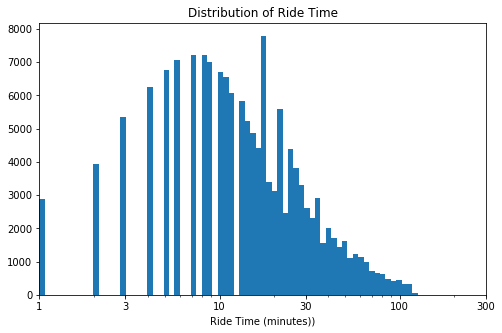

In [11]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(bike_data['ride_time'].max())+log_binsize, log_binsize)
values = [10, 30, 100, 300, 1000]
plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'ride_time', bins = bins)
plt.xscale('log')
plt.xlabel('Ride Time (minutes))')
plt.title("Distribution of Ride Time");
plt.xlim([0,125]);
plt.xticks([1, 3, 10, 30, 100, 300], [1, 3, 10, 30, 100, 300])
plt.show()

## Distribution of Distance

The Distance ridden is recorded in miles as the data comes from California, USA. After calculating the distance from the start/end and longitude/latitudes, it is clear that there are spikes near the .5 mile mark and the .8 mile mark.

There are a lot more spikes, the .5 mile mark, the ~.65 mile mark, and the .85 mile mark.

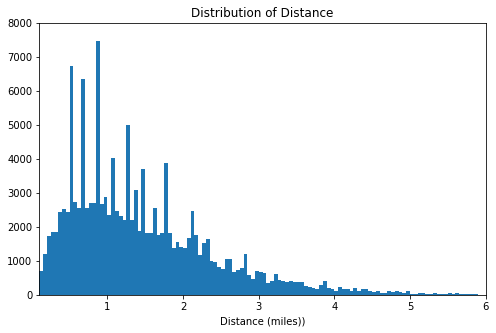

In [10]:
new_df = bike_data.dropna(subset=['distance'])


binsize = .05
bins = np.arange(0, new_df['distance'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'distance', bins = bins)
plt.xlim([.1,6])
plt.ylim([0,8000])
plt.xlabel('Distance (miles))')
plt.title("Distribution of Distance");

## Ride Time  vs. Distance

Plotting the Distance vs the Ride Time produces a linear relationship. The majority of riders are within a 30 minute bike ride within a 3 mile trip.

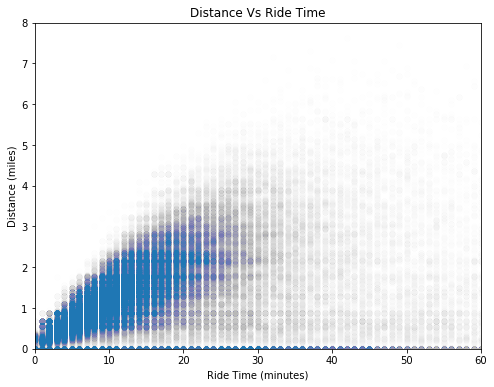

In [14]:
# scatter plot of price vs. carat, with log transform on price axis
new_df = bike_data.dropna(subset=['distance'])

plt.figure(figsize = [8, 6])
plt.scatter(data = new_df, x = 'ride_time', y = 'distance', alpha=1/500)
plt.xlim([0, 60])
plt.ylim([0, 8])
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title("Distance Vs Ride Time");
plt.show()

## Ride Time vs Distance for Rideable Types

Based on the graph, there was longer and farther rides on the electric bike vs the docked bike. To a point, there is an positive trend between ride time and distance however that seems to peak at around 35 minutes and 2.5 miles for the electric bike and 25 minutes and 1.5 miles for the docked bike.  

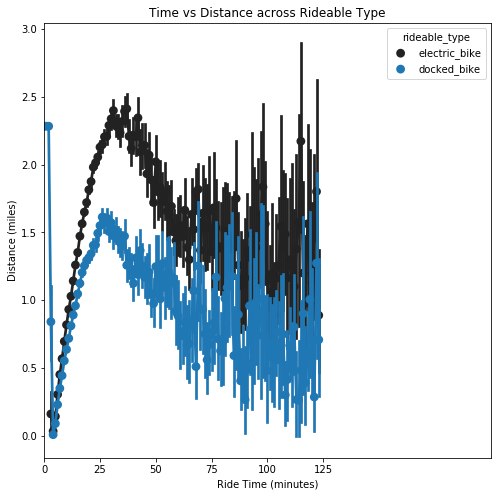

In [16]:
new_df = bike_data.dropna(subset=['distance'])

plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

sb.pointplot(data = new_df, x = 'ride_time', y = 'distance', hue = 'rideable_type', color = default_color)
plt.xlim([0, 200])
plt.xticks([0, 25, 50,75,100,125], [0,25, 50,75,100,125])
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title("Time vs Distance across Rideable Type");
plt.show()